In [24]:
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [25]:
df = pd.read_excel("dataset.xlsx", sheet_name=None, header=0)

# Section 4.3 (Table 4.3.1)

In [26]:
all_df = {}
for i, d in enumerate(df.items()):
    name, data = d
    all_df[name] = data
all_data = pd.concat(df.values())

In [27]:
all_data = all_data[[ "DEPTH", "DT", "GR", "LLD", "NPHI", "RHOB", "Log_Facies"]]
all_data = all_data.dropna(axis=0, how='any')
data = all_data

In [28]:
data = data[data['DEPTH'] == data["DEPTH"]]   # drop NaN value row

In [29]:
# data = data.drop(["Core_Facies"], axis=1)

In [30]:
data['Log_Facies'].apply(lambda x: str(x)).describe()

count     4695
unique       3
top        1.0
freq      2962
Name: Log_Facies, dtype: object

In [31]:
data['Label'] = data['Log_Facies'].apply(lambda x: str(x))
facies_labels = list(set(data['Label']))
facies_color_map = {}
facies_colors = ['blue', 'red', 'yellow']
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [32]:
var = list(data.columns.values)[:6]
var

['DEPTH', 'DT', 'GR', 'LLD', 'NPHI', 'RHOB']

<IPython.core.display.Javascript object>


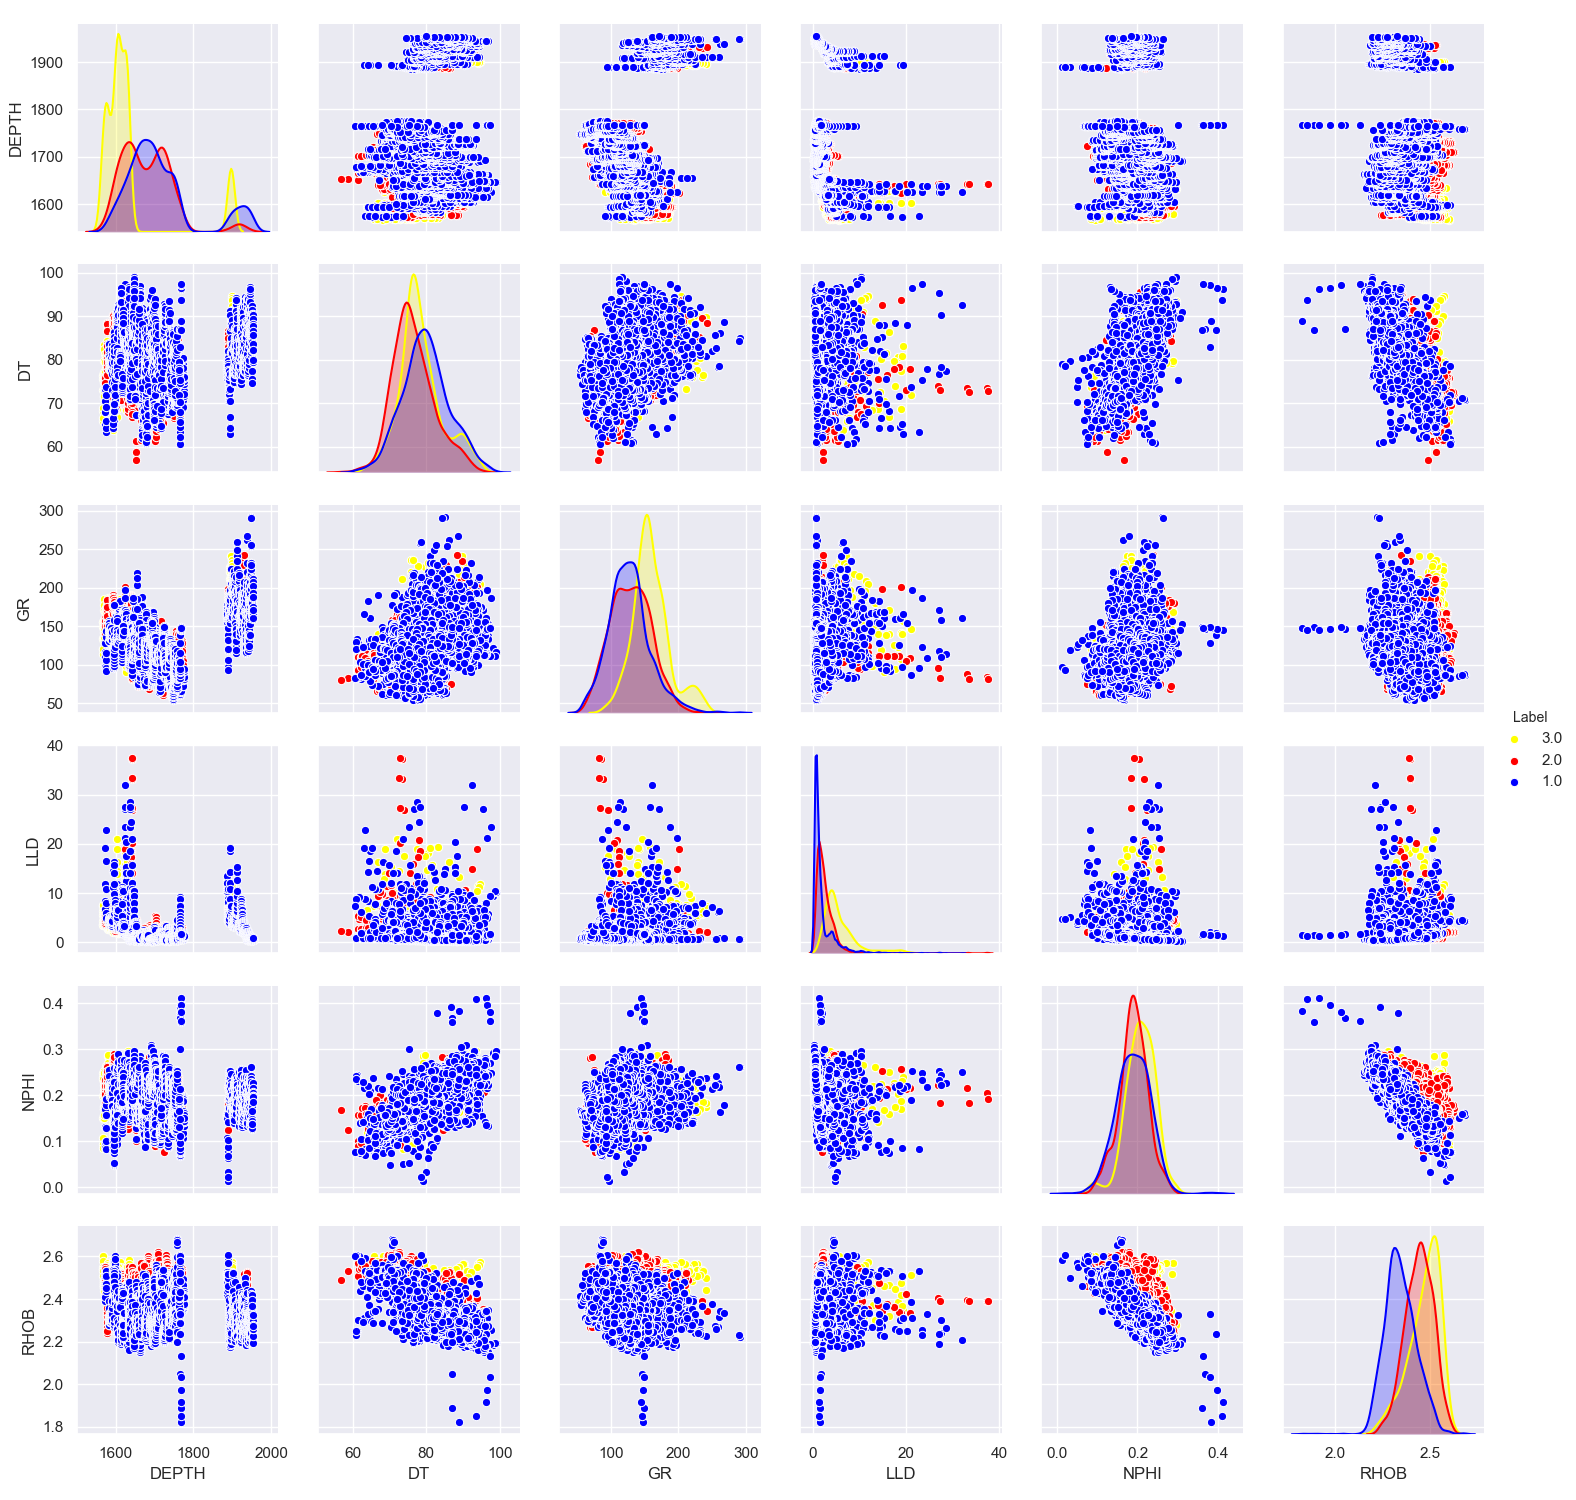

D:\ana\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [33]:
import seaborn as sns
sns.set()
sns.pairplot(data.drop([ 'Log_Facies'], axis=1),
         palette=facies_color_map,  hue='Label',
             hue_order=list(reversed(facies_labels)), vars=var)